# Chapter 8: How to Use Statistical Imputation

##  What is Statistical Imputation?
Statistical imputation is the process of replacing missing values in a dataset using calculated values such as:
- **Mean**: Average of available values.
- **Median**: Middle value in a sorted column.
- **Mode (Most Frequent)**: The most repeated value.
- **Constant**: A fixed value like 0 or -1.

Missing values are typically marked as `NaN` in Python using `pandas`.

---

## Dataset Used: Horse Colic Dataset
- Medical dataset on horse health with **26 input features** and **1 target**.
- Contains many missing values marked with `"?"`, which are converted to `NaN` using `na_values='?'`.
- Prediction task: **Binary classification** (whether surgery was needed).

---

##  Evaluation and Comparison
- Compared different imputation strategies on model accuracy.
- Found that **constant value (e.g. 0)** performed the best accuracy.
- Used boxplots to visualize the accuracy distribution across strategies.

---

##  Final Prediction
- Built a full pipeline with `SimpleImputer(strategy='constant')` and `RandomForestClassifier`.
- Predicted the class of a new data row with missing values.

---

##  Key Takeaways
- Always handle missing values before modeling.
- Statistical imputation is simple yet effective.
- Use pipelines to avoid **data leakage** during cross-validation.
- Test multiple strategies to find the best one for your dataset.



In [17]:
# summarize the horse colic dataset
from pandas import read_csv

# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?') # '?' will be changed as NaN

# summarize the first few rows
print(dataframe.head())

# summarize the number of rows with missing values for each column
for i in range(dataframe.shape[1]):
    # count number of rows with missing values
    n_miss = dataframe[[i]].isnull().sum().iloc[0]  # extract the actual int value
    perc = (n_miss / dataframe.shape[0]) * 100
    print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))


    0   1        2     3      4     5    6    7    8    9   ...    18    19  \
0  2.0   1   530101  38.5   66.0  28.0  3.0  3.0  NaN  2.0  ...  45.0   8.4   
1  1.0   1   534817  39.2   88.0  20.0  NaN  NaN  4.0  1.0  ...  50.0  85.0   
2  2.0   1   530334  38.3   40.0  24.0  1.0  1.0  3.0  1.0  ...  33.0   6.7   
3  1.0   9  5290409  39.1  164.0  84.0  4.0  1.0  6.0  2.0  ...  48.0   7.2   
4  2.0   1   530255  37.3  104.0  35.0  NaN  NaN  6.0  2.0  ...  74.0   7.4   

    20   21   22  23     24  25  26  27  
0  NaN  NaN  2.0   2  11300   0   0   2  
1  2.0  2.0  3.0   2   2208   0   0   2  
2  NaN  NaN  1.0   2      0   0   0   1  
3  3.0  5.3  2.0   1   2208   0   0   1  
4  NaN  NaN  2.0   2   4300   0   0   2  

[5 rows x 28 columns]
> 0, Missing: 1 (0.3%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 60 (20.0%)
> 4, Missing: 24 (8.0%)
> 5, Missing: 58 (19.3%)
> 6, Missing: 56 (18.7%)
> 7, Missing: 69 (23.0%)
> 8, Missing: 47 (15.7%)
> 9, Missing: 32 (10.7%)
> 10, M

## Statistical Imputation With SimpleImputer

The scikit-learn machine learning library provides the SimpleImputer class that supports **statistical imputation**. In this section,
we will explore how to effectively use the SimpleImputer class.

In [21]:
# statistical imputation transform for the horse colic dataset
from numpy import isnan
from pandas import read_csv
from sklearn.impute import SimpleImputer
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23] # Column 23 is the target/output  
X, y = data[:, ix], data[:, 23]

# summarize total missing
print('Missing: %d' % sum(isnan(X).flatten()))

# define imputer
imputer = SimpleImputer(strategy='mean')

# fit on the dataset
imputer.fit(X)

# transform the dataset
Xtrans = imputer.transform(X)

# summarize total missing
print('Missing: %d' % sum(isnan(Xtrans).flatten()))

Missing: 1605
Missing: 0


#### SimpleImputer and Model Evaluation

In [24]:
# evaluate mean imputation and random forest for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

dataframe = read_csv('horse-colic.csv', header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# define modeling pipeline
model = RandomForestClassifier()
imputer = SimpleImputer(strategy='mean')
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])

# define model evaluation
cv = KFold(n_splits=10)

# evaluate model
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv)
#print(scores)
print('Mean Accuracy:', mean(scores)*100)

Mean Accuracy: 85.33333333333334


#### Comparing Different Imputed Statistics

mean 86.66666666666669
median 86.66666666666669
most_frequent 87.66666666666667
constant 88.00000000000001


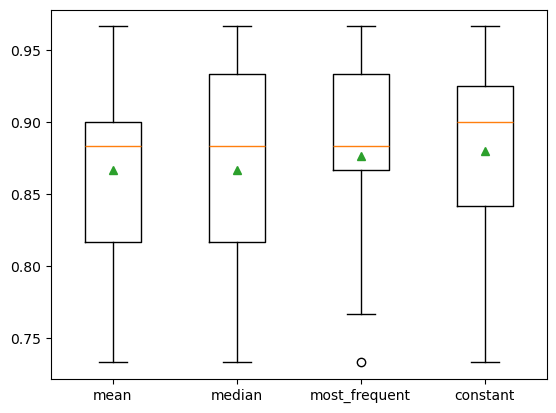

In [38]:
# Listing 8.16 compare statistical imputation strategies for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# load dataset
dataframe = read_csv('horse-colic.csv', header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# evaluate each strategy on the dataset
results = list()
strategies = ['mean', 'median', 'most_frequent', 'constant']

for s in strategies:
   
    # create the modeling pipeline
    pipeline = Pipeline(steps=[('i', SimpleImputer(strategy=s)), ('m', RandomForestClassifier())])
    
    # evaluate the model
    cv = KFold(n_splits=10)
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    
    # store results
    results.append(scores)
    print(s, mean(scores)*100)
    
# plot model performance for comparison
pyplot.boxplot(results, tick_labels=strategies, showmeans=True)
pyplot.show()

SimpleImputer Transform When **Making a Prediction**

In [43]:
# constant imputation strategy and prediction for the horse colic dataset
from numpy import nan
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

dataframe = read_csv('horse-colic.csv', header=None, na_values='?')

# split into input and output elements
data = dataframe.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

# create the modeling pipeline
pipeline = Pipeline(steps=[('i', SimpleImputer(strategy='constant')), ('m', RandomForestClassifier())])

# fit the model
pipeline.fit(X, y)



# define new data
row = [2, 1, 530101, 38.50, 66, 28, 3, 3, nan, 2, 5, 4, 4, nan, nan, nan, 3, 5, 45.00, 8.40, nan, nan, 2, 11300, 00000, 00000, 2]

# make a prediction
yhat = pipeline.predict([row])

# summarize prediction
print('Predicted Class: %d' % yhat[0])

Predicted Class: 2


In [45]:
# define new data
row = [nan, 1, 530101, 38.50, nan, 28, 3, 3, nan, 2, 5, 4, 4, nan, nan, nan, 3, 5, 45.00, 8.40, nan, nan, 2, 11300, 00000, 00000, 2]

# make a prediction
yhat = pipeline.predict([row])

# summarize prediction
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1


In [51]:
# define new data
row = [2, 1, 530101, 38.50, nan, 28, 3, 3, nan, 2, 5, 4, 4, nan, nan, nan, 3, 5, 45.00, 8.40, nan, nan, 2, nan, nan, nan, nan]

# make a prediction
yhat = pipeline.predict([row])

# summarize prediction
print('Predicted Class: %d' % yhat[0])

Predicted Class: 2
